<a href="https://colab.research.google.com/github/lourdesvaca/repository-algoritmica-avanzada-2023-2/blob/algoritmica-avanzada/AA_p3_KNeighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
dataset = pd.read_csv('diamonds.csv')

In [3]:
dataset

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
dataset.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [5]:
dataset.tail(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
53930,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53931,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53932,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47
53933,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49
53934,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [6]:
dataset.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [7]:
dataset.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [8]:
dataset.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [9]:
dataset.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [16]:
dataset.price.unique()

array([ 326,  327,  334, ..., 2753, 2755, 2756])

In [13]:
length = len(dataset["price"])

In [15]:
print(length)

53940


In [17]:
dataset['cut'] = dataset.cut.map({'Ideal':1,'Premium':2, 'Good':3, 'Very Good':4, 'Fair':5})

In [18]:
dataset['color'] = dataset.color.map({'E':1,'I':2, 'J':3, 'H':4, 'F':5, 'G':6, 'D':7})

In [19]:
dataset['clarity'] = dataset.clarity.map({'SI2':1, 'SI1':2, 'VS1':3, 'VS2':4, 'VVS2':5, 'VVS1':6, 'I1':7, 'IF':8})

In [20]:
dataset.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [21]:
dataset.info

<bound method DataFrame.info of        carat  cut  color  clarity  depth  table  price     x     y     z
0       0.23    1      1        1   61.5   55.0    326  3.95  3.98  2.43
1       0.21    2      1        2   59.8   61.0    326  3.89  3.84  2.31
2       0.23    3      1        3   56.9   65.0    327  4.05  4.07  2.31
3       0.29    2      2        4   62.4   58.0    334  4.20  4.23  2.63
4       0.31    3      3        1   63.3   58.0    335  4.34  4.35  2.75
...      ...  ...    ...      ...    ...    ...    ...   ...   ...   ...
53935   0.72    1      7        2   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72    3      7        2   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70    4      7        2   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    2      4        1   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75    1      7        1   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]>

In [22]:
dataset.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.228940,4.174416,3.256136,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.265976,2.050156,1.766539,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,1.000000,2.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,5.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,4.000000,6.000000,4.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [23]:
corr =  round(dataset.corr(), 4)
corr.style.background_gradient()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.114400,-0.065400,-0.281200,0.028200,0.181600,0.921600,0.975100,0.951700,0.953400
cut,0.114400,1.000000,-0.029100,-0.118700,0.169900,0.382000,0.049400,0.105400,0.105300,0.126700
color,-0.065400,-0.029100,1.000000,0.032600,-0.001700,-0.034000,-0.016600,-0.055300,-0.054800,-0.055700
clarity,-0.281200,-0.118700,0.032600,1.000000,-0.025900,-0.133700,-0.140300,-0.305900,-0.297000,-0.300000
depth,0.028200,0.169900,-0.001700,-0.025900,1.000000,-0.295800,-0.010600,-0.025300,-0.029300,0.094900
table,0.181600,0.382000,-0.034000,-0.133700,-0.295800,1.000000,0.127100,0.195300,0.183800,0.150900
price,0.921600,0.049400,-0.016600,-0.140300,-0.010600,0.127100,1.000000,0.884400,0.865400,0.861200
x,0.975100,0.105400,-0.055300,-0.305900,-0.025300,0.195300,0.884400,1.000000,0.974700,0.970800
y,0.951700,0.105300,-0.054800,-0.297000,-0.029300,0.183800,0.865400,0.974700,1.000000,0.952000
z,0.953400,0.126700,-0.055700,-0.300000,0.094900,0.150900,0.861200,0.970800,0.952000,1.000000


<Axes: >

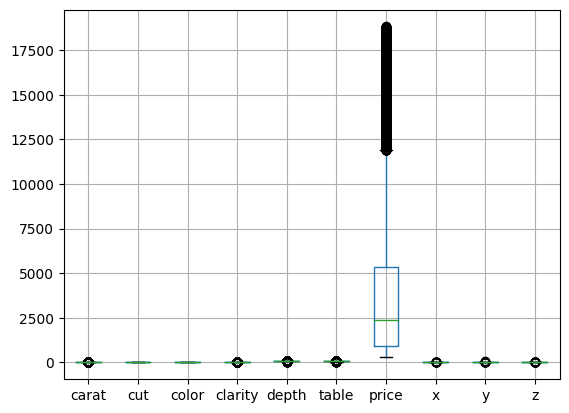

In [24]:
dataset.boxplot()

División de la data en variable "x" e "y".

In [26]:
data_x = dataset.drop(['price'], axis='columns')
data_y = dataset.price

In [27]:
data_x

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,1,1,1,61.5,55.0,3.95,3.98,2.43
1,0.21,2,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,3,1,3,56.9,65.0,4.05,4.07,2.31
3,0.29,2,2,4,62.4,58.0,4.20,4.23,2.63
4,0.31,3,3,1,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,1,7,2,60.8,57.0,5.75,5.76,3.50
53936,0.72,3,7,2,63.1,55.0,5.69,5.75,3.61
53937,0.70,4,7,2,62.8,60.0,5.66,5.68,3.56
53938,0.86,2,4,1,61.0,58.0,6.15,6.12,3.74


In [28]:
data_y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [36]:
model_neighbors =  KNeighborsClassifier(n_neighbors=5)

In [42]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size= 0.1)

In [43]:
model_neighbors.fit(train_x, train_y)

KNeighborsClassifier()

In [44]:
y_predicted = model_neighbors.predict(test_x)

In [45]:
print(f'Score de prueba: {round(model_neighbors.score(test_x, test_y), 4) * 100}%')

Score de prueba: 2.56%


In [46]:
print(f'Score de entrenamiento: {round(model_neighbors.score(train_x, train_y), 4) * 100}%')

Score de entrenamiento: 20.3%
